In [1]:
import os
import warnings
import skimage
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tqdm import tqdm
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import pysaliency
from pysaliency.utils import MatlabOptions
from saliency_model.itti_koch import IttiKoch
from saliency_model.deep_gaze import run_deep_gaze

In [3]:
plt.rcParams['image.cmap'] = 'gray'
MatlabOptions.matlab_names = ['matlab', 'matlab.exe', '/usr/local/MATLAB/R2017b/bin/matlab']
MatlabOptions.octave_names = []

In [4]:
# Load The Image
path = './imgs/balloons.jpg'
img = mpimg.imread(path)

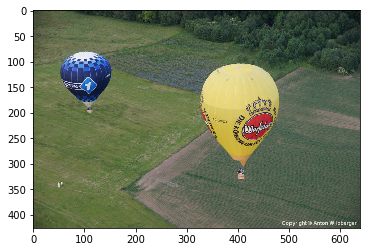

In [5]:
plt.imshow(img)

In [18]:
np.shape(img)[2]

(426, 640, 3)

In [6]:
# account for png files
if np.shape(img)[2] == 4:
    img = img[:,:,0:3]

In [25]:
 int(np.shape(img)[1]/3)

213

In [26]:
# initiate our model
inp_params = {
"min_mapwidth": int(np.shape(img)[1]/3),
"num_center_scales": 3,
}
            
IK = IttiKoch(verbose=False, input_params=inp_params)

In [8]:
# initate models from pysaliency
aim = pysaliency.AIM(location='test_models', cache_location=os.path.join('model_caches', 'AIM'))
sun = pysaliency.SUN(location='test_models', cache_location=os.path.join('model_caches', 'SUN'))
cas = pysaliency.ContextAwareSaliency(location='test_models', cache_location=os.path.join('model_caches', 'ContextAwareSaliency'))
covsal = pysaliency.CovSal(location='test_models', cache_location=os.path.join('model_caches', 'CovSal'))
gbvs = pysaliency.GBVS(location='test_models', cache_location=os.path.join('model_caches', 'GBVS'))
gbvs_ik = pysaliency.GBVSIttiKoch(location='test_models', cache_location=os.path.join('model_caches', 'GBVS'))

In [9]:
# calculate saliency
pbar = tqdm(total=100)

# run deep gaze models
smap, log_density_prediction = run_deep_gaze(img)
pbar.update(10)
smap_icf, log_density_prediction_icf = run_deep_gaze(img, model='ICF')
pbar.update(10)

## Temporary testing IK

In [30]:
# Load The Image
path = './imgs/balloons.jpg'
img = mpimg.imread(path)

In [27]:
# run IK and faces
saliency, _ = IK.run(img)
pbar.update(10)
saliency_face_only, _ = IK.run(img, keys = [], faces=True)
pbar.update(10)

In [ ]:
plt.imshow()

In [9]:
# run pysaliency models
smap_aim = aim.saliency_map(img)
pbar.update(10)
smap_sun = sun.saliency_map(img)
pbar.update(10)
smap_cas = cas.saliency_map(img)
pbar.update(10)
smap_covsal = covsal.saliency_map(img)
pbar.update(10)
smap_gbvs = gbvs.saliency_map(img)
pbar.update(10)
smap_gbvs_ik = gbvs_ik.saliency_map(img)
pbar.update(10)

pbar.close()

  0%|          | 0/100 [00:00<?, ?it/s]

'model_variables' collection should be of type 'byte_list', but instead is of type 'node_list'.
INFO:tensorflow:Restoring parameters from ../deep_gaze/DeepGazeII.ckpt


 10%|█         | 10/100 [00:10<01:33,  1.04s/it]

'model_variables' collection should be of type 'byte_list', but instead is of type 'node_list'.
INFO:tensorflow:Restoring parameters from ../deep_gaze/ICF.ckpt


100%|██████████| 100/100 [02:34<00:00,  1.55s/it]


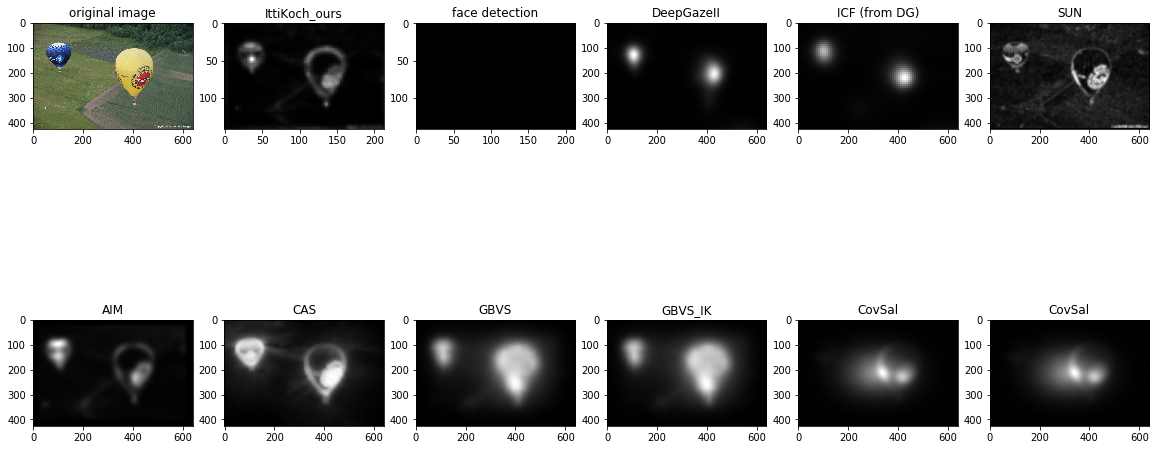

In [28]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20, 10))
ax[0][0].imshow(img)
ax[0][1].imshow(saliency)
ax[0][2].imshow(saliency_face_only)
ax[0][3].imshow(smap)
ax[0][4].imshow(smap_icf)
ax[0][5].imshow(smap_sun)

ax[1][0].imshow(smap_aim)
ax[1][1].imshow(smap_cas)
ax[1][2].imshow(smap_gbvs)
ax[1][3].imshow(smap_gbvs_ik)
ax[1][4].imshow(smap_covsal)
ax[1][5].imshow(smap_covsal)

ax[0][0].set_title('original image')
ax[0][1].set_title('IttiKoch_ours')
ax[0][2].set_title('face detection')
ax[0][3].set_title('DeepGazeII')
ax[0][4].set_title('ICF (from DG)')
ax[0][5].set_title('SUN')

ax[1][0].set_title('AIM')
ax[1][1].set_title('CAS')
ax[1][2].set_title('GBVS')
ax[1][3].set_title('GBVS_IK')
ax[1][4].set_title('CovSal')
ax[1][5].set_title('CovSal')

plt.show()

In [29]:
print(np.shape(saliency))
print(np.shape(saliency_face_only))
print(np.shape(smap_aim))
print(np.shape(smap_sun))
print(np.shape(smap_cas))
print(np.shape(smap_covsal))
print(np.shape(smap_gbvs))
print(np.shape(smap_gbvs_ik))
print(np.shape(smap))
print(np.shape(smap_icf))

(142, 213)
(142, 213)
(426, 640)
(426, 640)
(426, 640)
(426, 640)
(426, 640)
(426, 640)
(426, 640)
(426, 640)
